# **Topic**:
We want to find out from students if taking a larger workload would affect their time management. 

Our goal is to examine students with different work loads during the quarter and compare how much time they allocate for different types of activities.

Question 1: What data do you have?
            We got our data from the shared responses of the survey for CS105 and CS111. (Dataset is from #/#/#)

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("data.csv")

## new data frame with only relevant data
df2 = df[['2. To which gender identity do you most identify?\r\n', '10. Are you currently dating/in a relationship?','20. How many units are you taking currently?',
          '27. How many times a week do you attend office hours on average?','28. On average, how many hours do you study per week? (excluding homework)',
          '29. On average, how many hours do you spend on homework per week?','56. On average, how many hours of sleep do you get per day?',
          '39. On average, how many hours do you spend on clubs and extracurricular activities per week?','55. How are you feeling this quarter?']].copy()

df2

,2. To which gender identity do you most identify?\r\n,10. Are you currently dating/in a relationship?,20. How many units are you taking currently?,27. How many times a week do you attend office hours on average?,"28. On average, how many hours do you study per week? (excluding homework)","29. On average, how many hours do you spend on homework per week?","56. On average, how many hours of sleep do you get per day?","39. On average, how many hours do you spend on clubs and extracurricular activities per week?",55. How are you feeling this quarter?
0,Man,Yes,20.0,0.0,7.0,7.0,7.0,5.0,5.0
1,Woman,Yes,13.0,0.0,6.0,6.0,7.0,2.0,5.0
2,Man,No,12.0,0.0,7.0,4.0,7.0,2.0,2.0
3,Woman,Yes,16.0,0.0,1.0,8.0,9.0,1.0,2.0
4,Man,Yes,16.0,0.0,4.0,10.0,8.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
219,Woman,No,12.0,0.0,4.0,8.0,6.0,4.0,4.0
220,Man,No,13.0,1.0,12.0,15.0,6.0,2.0,2.0
221,Man,Yes,13.0,0.0,10.0,10.0,6.0,5.0,5.0
222,Woman,Yes,17.0,0.0,10.0,10.0,7.0,1.0,5.0


## Question 2: What would you like to know?

**Explanation:**

We would like to know:

- how many units students are taking
- how many hours of sleep students get
- how many hours are dedicated to homework
- how stressed students are
- how many hours are dedicated to extracuricalar activities

All of this corresponds to our topic of analyzing how students manage their time management during the quarter. So for this, we will extract the data we want to grab.

## Question 3: Explore the data. (Generate statistics, perform visualizations)

**Explanation**
- median of average workload(units). Median is used because it is not heavily influenced by outliers.

These are just graphs that I created just to see how they look in different ways. (ADDING MORE LATER OR SOMEONE ESLE CAN ADD MORE)

In [204]:
## clean up data and create new data columns for cleaner presentation of graphs
unit_range = []
academic_hrs_total = []

## Clean nan values to zero
df2 = df2.fillna(0)

## create list of unit range data
for i in df2['20. How many units are you taking currently?']:
  
  if i > 16:
    unit_range.append('16+ Units')
  elif i >= 12 and i < 16:
    unit_range.append('[12,16) Units')
  elif i >= 8 and i < 12:
    unit_range.append('[8,12) Units')
  else:
    unit_range.append('[0,8) Units')

## sum both columns for total academic hours data
academic_hrs_total = df2.loc[:,['28. On average, how many hours do you study per week? (excluding homework)','29. On average, how many hours do you spend on homework per week?']].sum(axis=1)

## add extra columns to df
df2['unit_range'] = unit_range
df2['academic_hrs_total'] = academic_hrs_total

## create a diplay order for graphs
order = ['[0,8) Units','[8,12) Units','[12,16) Units','16+ Units']

## Workload vs Stress

**Explanation**

Creating a pivot table to see if there is any possible correlation between increased workload and increased stress. Using median to get average becuase it is less influenced by outliers.

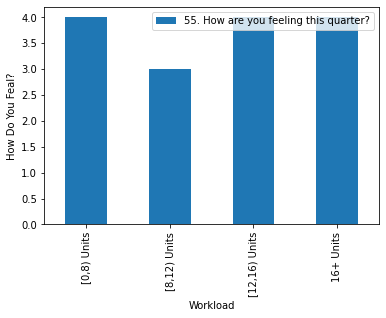

In [205]:
workload_stress= pd.pivot_table(data= df2, index= df2.unit_range, values= ['55. How are you feeling this quarter?'], aggfunc= 'median')
workload_stress.loc[order].plot(kind='bar',xlabel = 'Workload', ylabel = 'How Do You Feal?')

## Sleep vs Hw hours

**Explanation**

Generating a scatter plot based off of the average hours spent on homework vs hours of sleep

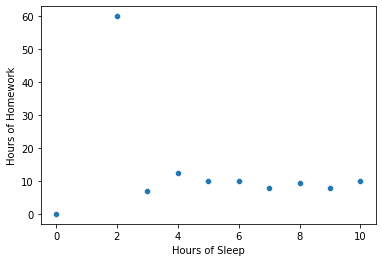

In [206]:
sleep_vs_hw = pd.pivot_table(data= df2, index=['56. On average, how many hours of sleep do you get per day?'], values= ['29. On average, how many hours do you spend on homework per week?'], aggfunc= 'median')

sns.scatterplot(data= sleep_vs_hw, x= '56. On average, how many hours of sleep do you get per day?', y= '29. On average, how many hours do you spend on homework per week?')
plt.xlabel("Hours of Sleep")
plt.ylabel("Hours of Homework")
plt.show()

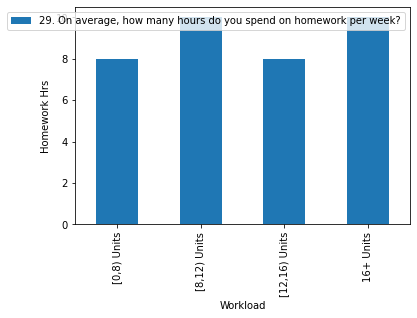

In [207]:
workload_homework = pd.pivot_table(data= df2, index=df2.unit_range, values= ['29. On average, how many hours do you spend on homework per week?'], aggfunc= 'median')
workload_homework.loc[order].plot(kind= 'bar', xlabel= 'Workload', ylabel = 'Homework Hrs')

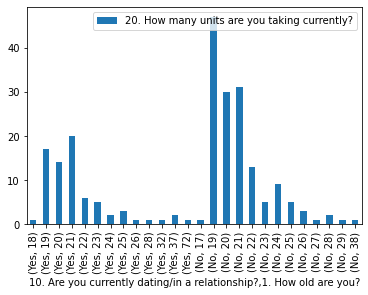

In [208]:
bartable = pd.pivot_table(data = df, values = '20. How many units are you taking currently?', index = ['10. Are you currently dating/in a relationship?','1. How old are you?'], aggfunc = 'count')
bartable.loc[['Yes','No']].plot(kind='bar')

## Pairwise Pearson's correlation of multiple columns and heatmap

**Explanation**

The Pearson's correlation is a measure of linear correlation between two sets of data. The normalized measurement of the covariance suggests a strong/weak positive/negative linear correlation with values ranging from −1 and 1.

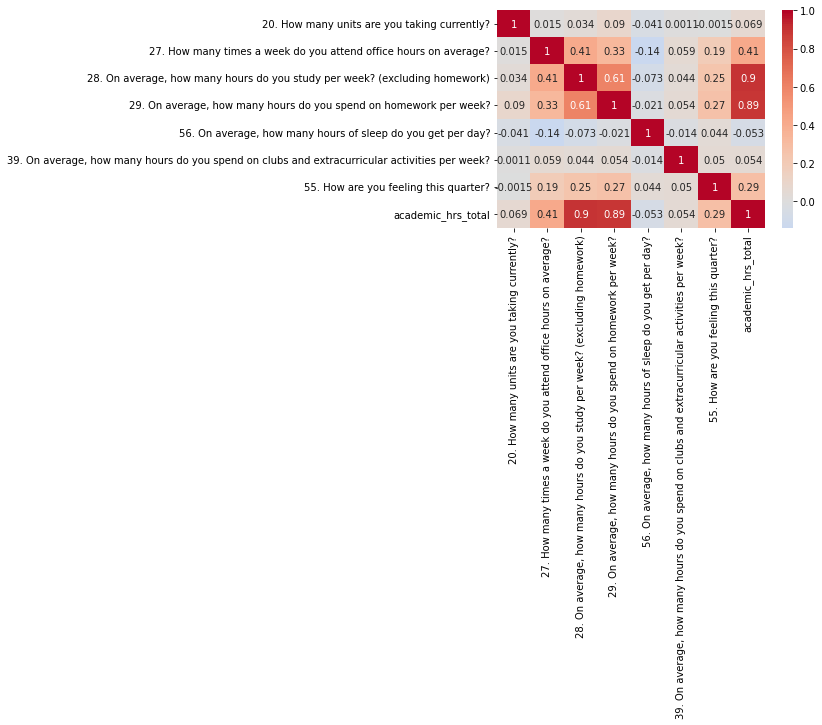

In [209]:
## perform pearsons pairwise correlation on multiple columns
df_cor = df2.corr()

## display heatmap of pearsons correlation
sns.heatmap(df_cor, center= 0, cmap = "coolwarm",annot= True)
plt.show()

##Workload vs Average Academic hrs vs Average Activity hrs vs Average Sleep hrs 

**Explanation**

I wanted to show a correlation between workload and averaged data of academic, activity, and sleep hours(I made a stacked bar graph but overall would like to be able to normalize first then display stacked bar graph)

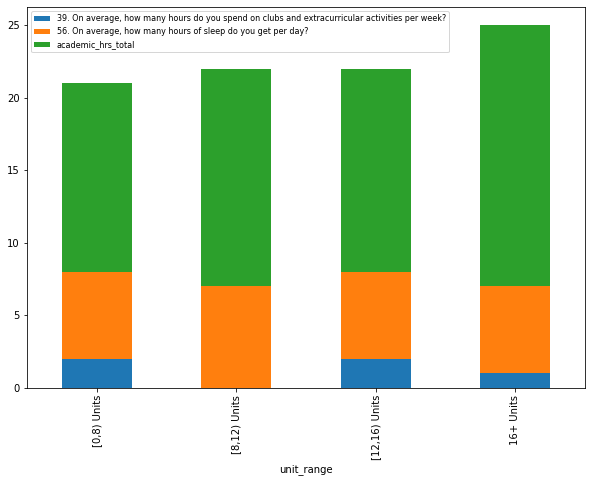

In [210]:
## create a dataframe to use for mutiple column values 
values = df2[['academic_hrs_total','39. On average, how many hours do you spend on clubs and extracurricular activities per week?' ,'56. On average, how many hours of sleep do you get per day?' ]]

## pivot table of workload vs total academic hours, activity hours, and hours of sleep
workload_vs_acad_activ_sleep = pd.pivot_table(data= df2, index= df2.unit_range, values= values, aggfunc='median')

## stacked bar graph
workload_vs_acad_activ_sleep.loc[order].plot.bar(stacked= True, figsize=(10, 7))
plt.legend(prop={'size': 8})

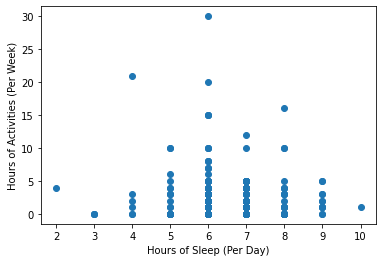

In [211]:
plt.scatter(df['56. On average, how many hours of sleep do you get per day?'],df['39. On average, how many hours do you spend on clubs and extracurricular activities per week?'])
plt.xlabel("Hours of Sleep (Per Day)")
plt.ylabel("Hours of Activities (Per Week)")
plt.show()

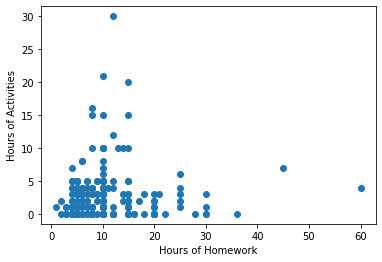

In [212]:
plt.scatter(df['29. On average, how many hours do you spend on homework per week?'],df['39. On average, how many hours do you spend on clubs and extracurricular activities per week?'])
plt.xlabel("Hours of Homework")
plt.ylabel("Hours of Activities")
plt.show()

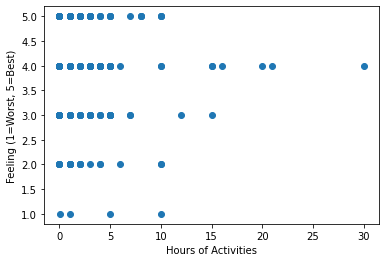

In [213]:
plt.scatter(df['39. On average, how many hours do you spend on clubs and extracurricular activities per week?'],df['55. How are you feeling this quarter?'])
plt.xlabel("Hours of Activities")
plt.ylabel("Feeling (1=Worst, 5=Best)")
plt.show()

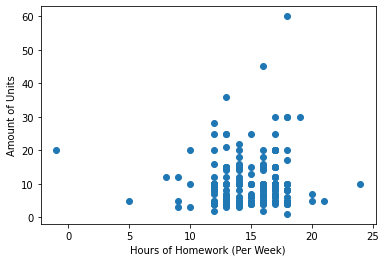

In [214]:
plt.scatter(df['20. How many units are you taking currently?'],df['29. On average, how many hours do you spend on homework per week?'])
plt.xlabel("Hours of Homework (Per Week)")
plt.ylabel("Amount of Units")
plt.show()

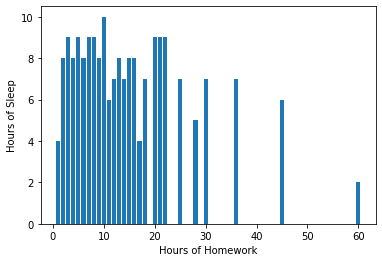

In [215]:
plt.bar(df['29. On average, how many hours do you spend on homework per week?'],df['56. On average, how many hours of sleep do you get per day?'])
plt.xlabel("Hours of Homework")
plt.ylabel("Hours of Sleep")
plt.show()

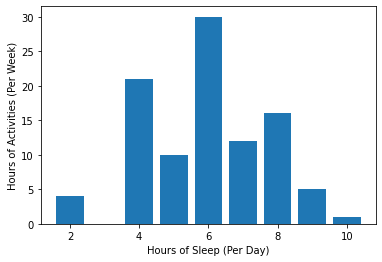

In [216]:
from locale import normalize
plt.bar(df['56. On average, how many hours of sleep do you get per day?'],df['39. On average, how many hours do you spend on clubs and extracurricular activities per week?'])
plt.xlabel("Hours of Sleep (Per Day)")
plt.ylabel("Hours of Activities (Per Week)")
plt.show()

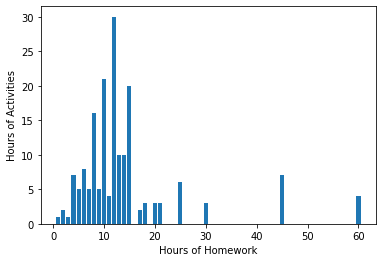

In [217]:
plt.bar(df['29. On average, how many hours do you spend on homework per week?'],df['39. On average, how many hours do you spend on clubs and extracurricular activities per week?'])
plt.xlabel("Hours of Homework")
plt.ylabel("Hours of Activities")
plt.show()

Text(0, 0.5, 'Hours of sleep (Per Day)')

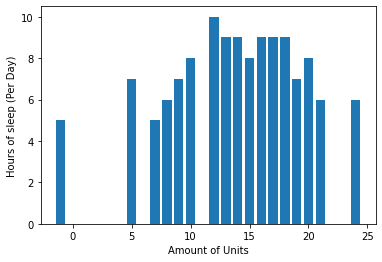

In [218]:
plt.bar(df['20. How many units are you taking currently?'],df['56. On average, how many hours of sleep do you get per day?'])
plt.xlabel("Amount of Units")
plt.ylabel("Hours of sleep (Per Day)")

Text(0, 0.5, 'Hours of extracurricular activities (Per Week)')

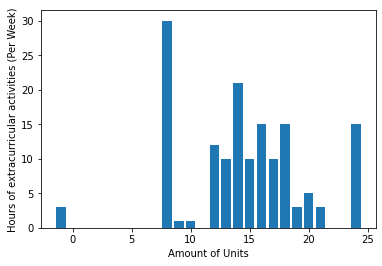

In [219]:
plt.bar(df['20. How many units are you taking currently?'],df['39. On average, how many hours do you spend on clubs and extracurricular activities per week?'])
plt.xlabel("Amount of Units")
plt.ylabel("Hours of extracurricular activities (Per Week)")

Text(0, 0.5, 'Hours of doing homework (Per Week)')

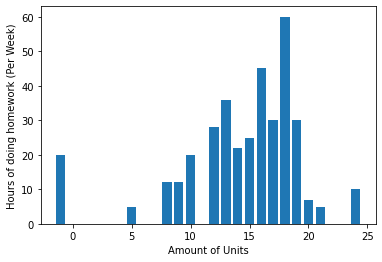

In [220]:
plt.bar(df['20. How many units are you taking currently?'],df['29. On average, how many hours do you spend on homework per week?'])
plt.xlabel("Amount of Units")
plt.ylabel("Hours of doing homework (Per Week)")

Text(0, 0.5, 'Feeling (1=Worst, 5=Best)')

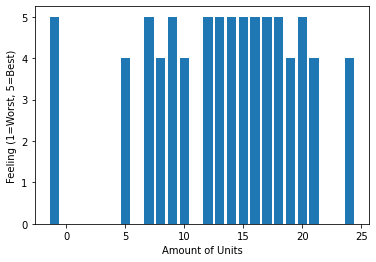

In [221]:
plt.bar(df['20. How many units are you taking currently?'],df['55. How are you feeling this quarter?'])
plt.xlabel("Amount of Units")
plt.ylabel("Feeling (1=Worst, 5=Best)")

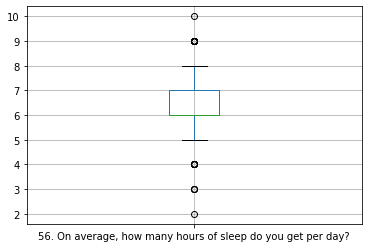

In [222]:
df.boxplot(column = ['56. On average, how many hours of sleep do you get per day?'])

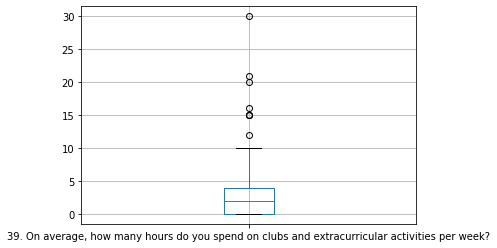

In [223]:
df.boxplot(column = ['39. On average, how many hours do you spend on clubs and extracurricular activities per week?'])

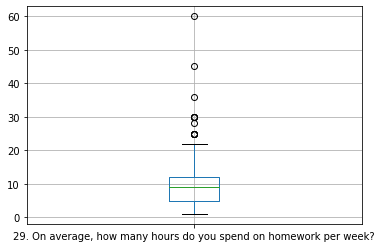

In [224]:
df.boxplot(column = ['29. On average, how many hours do you spend on homework per week?'])

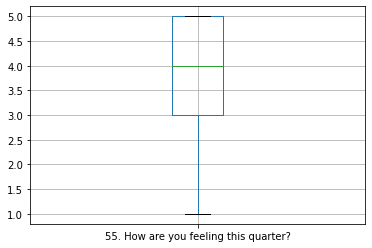

In [225]:
df.boxplot(column = ['55. How are you feeling this quarter?'])

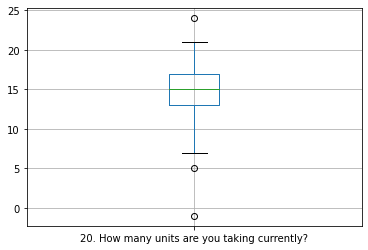

In [226]:
df.boxplot(column = ['20. How many units are you taking currently?'])

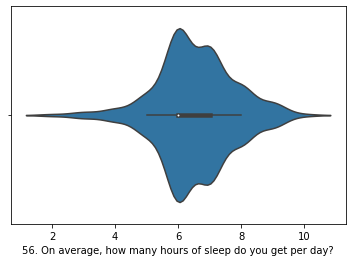

In [227]:
sns.violinplot(x = df["56. On average, how many hours of sleep do you get per day?"])

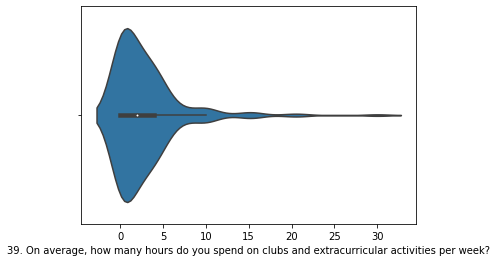

In [228]:
sns.violinplot(x = df['39. On average, how many hours do you spend on clubs and extracurricular activities per week?'])

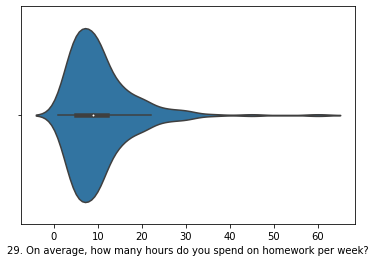

In [229]:
sns.violinplot(x = df['29. On average, how many hours do you spend on homework per week?'])

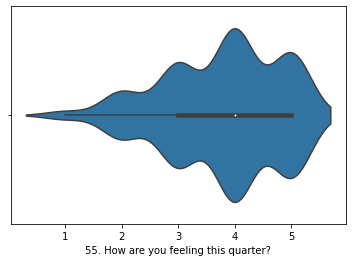

In [230]:
sns.violinplot(x = df['55. How are you feeling this quarter?'])

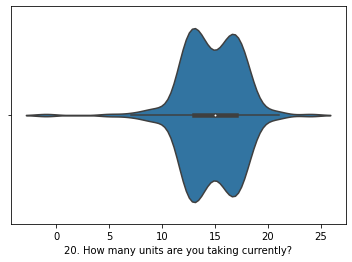

In [231]:
sns.violinplot(x = df['20. How many units are you taking currently?'])

(array([ 1.,  3.,  6., 19.,  0., 85., 65., 28., 12.,  1.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

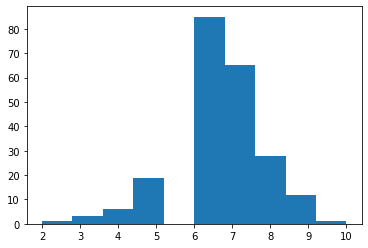

In [232]:
plt.hist(df["56. On average, how many hours of sleep do you get per day?"])

(array([126.,  64.,   8.,   8.,   1.,   4.,   1.,   1.,   0.,   1.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

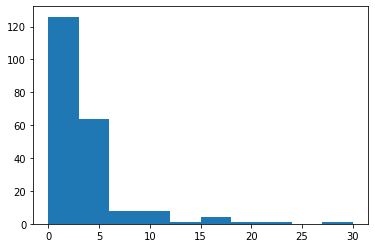

In [233]:
plt.hist(df['39. On average, how many hours do you spend on clubs and extracurricular activities per week?'])

(array([75., 88., 26., 14., 10.,  1.,  0.,  1.,  0.,  1.]),
 array([ 1. ,  6.9, 12.8, 18.7, 24.6, 30.5, 36.4, 42.3, 48.2, 54.1, 60. ]),
 <a list of 10 Patch objects>)

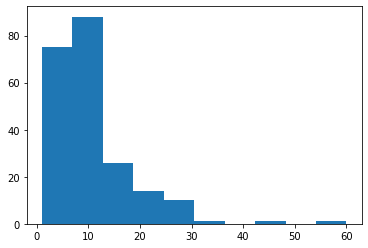

In [234]:
plt.hist(df['29. On average, how many hours do you spend on homework per week?'])

(array([ 4.,  0., 23.,  0.,  0., 50.,  0., 83.,  0., 60.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

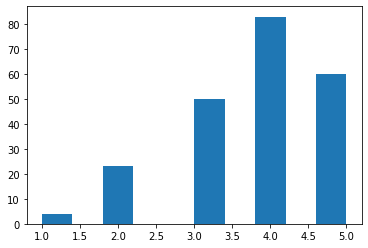

In [235]:
plt.hist(df['55. How are you feeling this quarter?'])

(array([ 1.,  0.,  1.,  2.,  6., 73., 74., 60.,  5.,  1.]),
 array([-1. ,  1.5,  4. ,  6.5,  9. , 11.5, 14. , 16.5, 19. , 21.5, 24. ]),
 <a list of 10 Patch objects>)

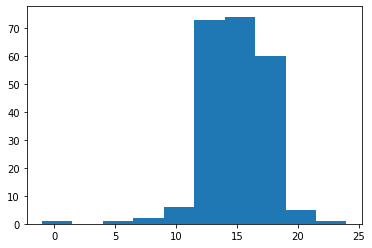

In [236]:
plt.hist(df['20. How many units are you taking currently?'])

## Question 4: Can you state any hypothesis or make predictions? Which tests can you apply to verify your hypothesis?

**Explanation**

Hypothesis 1: Larger workload increases a students stress

Hypotheses 2: Larger workload increases time spent on studying and homework

Hypotheses 3: Larger workload decreases time involved in non-academic activities

## Question 5: Test your hypothesis

**Explanation**